In [1]:
import os
import numpy as np
import glob
import json
import pandas as pd

In [2]:
PATH = '/home/anneke/Documents/models/weights'

w_dir = glob.glob1(PATH, 'int*')

In [4]:
from collections import defaultdict

data = defaultdict(list)

In [5]:
for w in w_dir:
    conf = glob.glob1(os.path.join(PATH, w), "CONF*")
    
    if conf:
        with open(os.path.join(PATH, '{}/CONFIG'.format(w))) as j:
            config = json.load(j)
            
            data['dataset'].append(config['args']['dataset'])
            data['train_mode'].append(config['args']['train_mode'])
            data['word_len'].append(config['args']['word_len'])
            data['epochs'].append(config['args']['epochs'])
            data['batch_size'].append(config['args']['batch_size'])
            data['start_time'].append(config['start_time'])
            data['end_time'].append(config['end_time'])
            data['total_keyword'].append(config['data_summary']['keyword']['total'])
            data['x_train'].append(config['data_summary']['data']['train'])
            data['x_test'].append(config['data_summary']['data']['test'])
            data['loss'].append(config['report']['loss'])
            data['accuracy'].append(config['report']['acc'])
            data['total_accept'].append(config['report']['total_accept'])
            data['total_reject'].append(config['report']['total_reject'])
            data['rejection_rate'].append(config['report']['rejection_rate'])

In [6]:
[len(d) for d in data.values()]

[57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]

In [7]:
pdf = pd.DataFrame(data)

In [8]:
# df.to_csv('./result.csv')

In [9]:
df = pdf[pdf['epochs'] == 1]

In [10]:
adf = pdf[pdf['epochs'] == 1000]

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

## 1 epoch

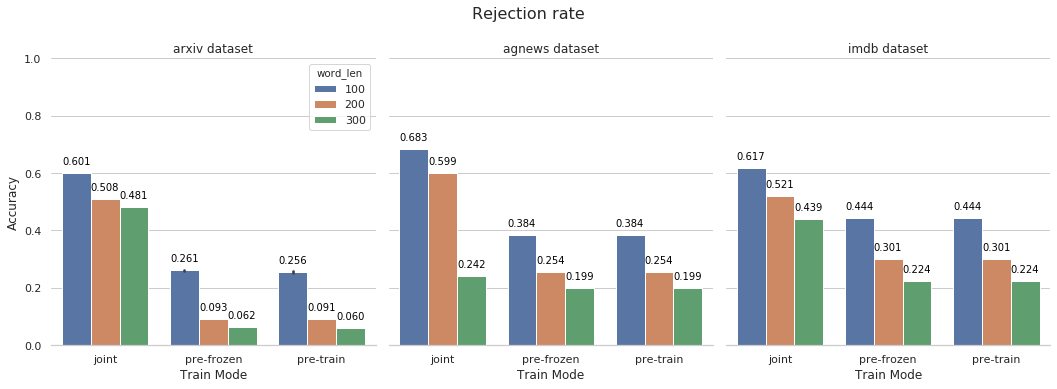

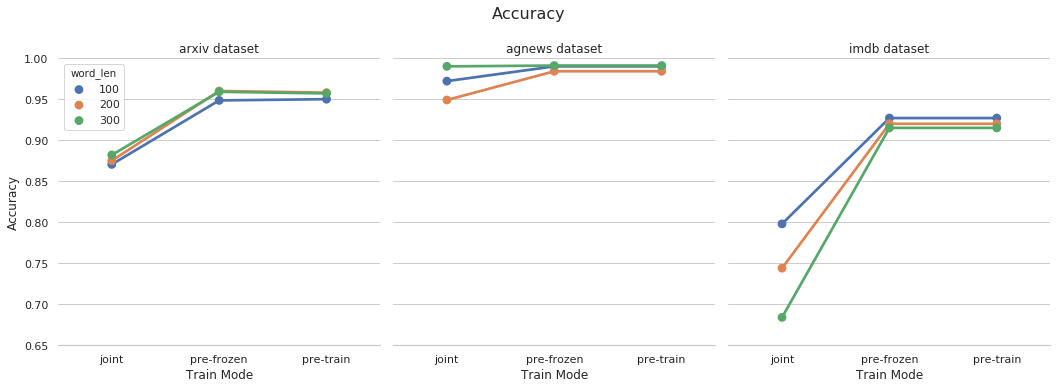

In [12]:

sns.set(style="whitegrid")
g = sns.catplot(x="train_mode", y="rejection_rate",
                 hue="word_len", col="dataset",
                 data=df, kind="bar",
                 height=5.5, aspect=.9, legend_out=False)

(g.set_axis_labels("Train Mode", "Accuracy")
.set_xticklabels(["joint", "pre-frozen", "pre-train"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 1))
.despine(left=True)
.fig.suptitle('Rejection rate', fontsize=16)) 

plt.subplots_adjust(top=0.85)


for i in np.arange(3):
    ax1 = g.facet_axis(0,i)
    for p in ax1.patches:
        if str(p.get_height()) != 'nan':
            ax1.text(p.get_x(), 
                         p.get_height() + .03,
                         '{0:.3f}'.format(p.get_height()), 
                         color='black', 
                         rotation='horizontal', 
                         size='small')

g = sns.catplot(x="train_mode", y="accuracy",
                 hue="word_len", col="dataset",
                 data=df, kind="point",
                 height=5.5, aspect=.9, legend_out=False)

acc_ylim=(0.65,1)

(g.set_axis_labels("Train Mode", "Accuracy")
.set_xticklabels(["joint", "pre-frozen", "pre-train"])
.set_titles("{col_name} {col_var}")
.set(ylim=acc_ylim)
.despine(left=True)
.fig.suptitle('Accuracy', fontsize=16))  

plt.subplots_adjust(top=0.85)



## Continuous training

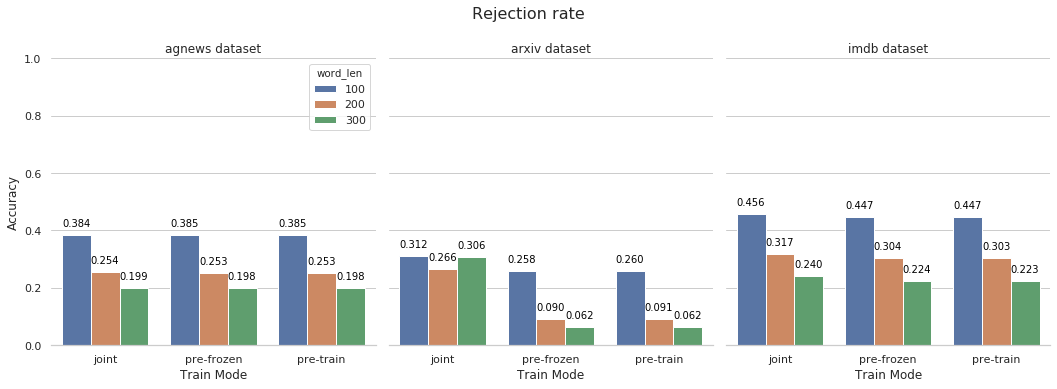

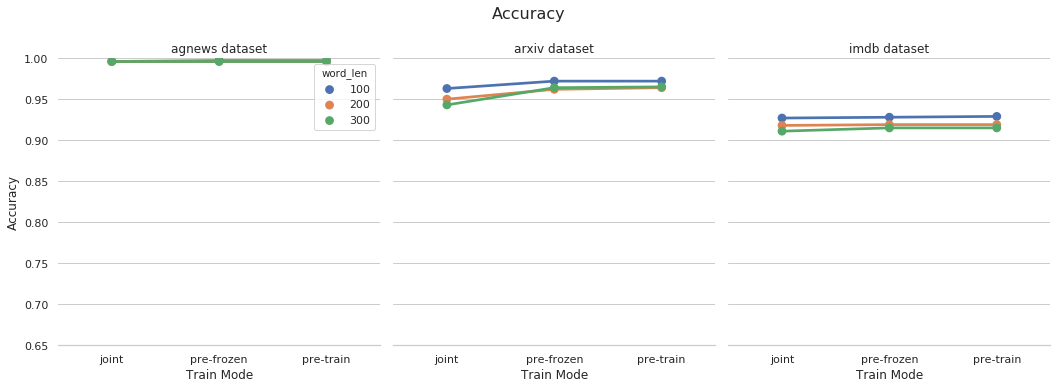

In [13]:

sns.set(style="whitegrid")
g = sns.catplot(x="train_mode", y="rejection_rate",
                 hue="word_len", col="dataset",
                 data=adf, kind="bar",
                 height=5.5, aspect=.9, legend_out=False)

(g.set_axis_labels("Train Mode", "Accuracy")
.set_xticklabels(["joint", "pre-frozen", "pre-train"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 1))
.despine(left=True)
.fig.suptitle('Rejection rate', fontsize=16)) 

plt.subplots_adjust(top=0.85)


for i in np.arange(3):
    ax1 = g.facet_axis(0,i)
    for p in ax1.patches:
        if str(p.get_height()) != 'nan':
            ax1.text(p.get_x(), 
                         p.get_height() + .03,
                         '{0:.3f}'.format(p.get_height()), 
                         color='black', 
                         rotation='horizontal', 
                         size='small')

g = sns.catplot(x="train_mode", y="accuracy",
                 hue="word_len", col="dataset",
                 data=adf, kind="point",
                 height=5.5, aspect=.9, legend_out=False)

acc_ylim=(0.65,1)

(g.set_axis_labels("Train Mode", "Accuracy")
.set_xticklabels(["joint", "pre-frozen", "pre-train"])
.set_titles("{col_name} {col_var}")
.set(ylim=acc_ylim)
.despine(left=True)
.fig.suptitle('Accuracy', fontsize=16))  

plt.subplots_adjust(top=0.85)



## Baseline

In [80]:
b_dir = glob.glob1(PATH, 'base*')
data = defaultdict(list)

In [81]:
b_dir

['base-imdb-200-19-08-28_18:32:29',
 'base-arxiv-200-19-08-28_18:32:29',
 'base-arxiv-300-19-08-28_18:32:29',
 'base-imdb-300-19-08-28_18:32:29',
 'base-agnews-200-19-08-28_18:32:29',
 'base-agnews-300-19-08-28_18:32:29',
 'base-imdb-100-19-08-28_18:32:29',
 'base-arxiv-100-19-08-28_18:32:29',
 'base-agnews-100-19-08-28_18:32:29']

In [82]:
for b in b_dir:
    conf = glob.glob1(os.path.join(PATH, b), "CONF*")
    
    if conf:
        with open(os.path.join(PATH, '{}/CONFIG'.format(b))) as j:
            config = json.load(j)
            
            data['dataset'].append(config['args']['dataset'])
            data['word_len'].append(config['args']['word_len'])
            data['start_time'].append(config['start_time'])
            data['end_time'].append(config['end_time'])
            data['total_keyword'].append(config['data_summary']['keyword']['total'])
            data['x_train'].append(config['data_summary']['data']['train'])
            data['x_test'].append(config['data_summary']['data']['test'])
            data['LR_tr'].append(config['results']['LR']['train_acc'])
            data['LR_te'].append(config['results']['LR']['test_acc'])
            data['LR_keys_tr_acc_wo_keyword'].append(config['results']['LR_keys']['train']['accuracy'])
            data['LR_keys_tr_acc'].append(config['results']['LR_keys']['train']['accuracy_with_reject'])
            data['LR_keys_tr_rejection_rate'].append(config['results']['LR_keys']['train']['rejection_rate'])
            data['LR_keys_tr_accepted'].append(config['results']['LR_keys']['train']['total_accept'])
            data['LR_keys_tr_rejected'].append(config['results']['LR_keys']['train']['total_reject'])
            
            data['LR_keys_te_acc_wo_keyword'].append(config['results']['LR_keys']['test']['accuracy'])
            data['LR_keys_te_acc'].append(config['results']['LR_keys']['test']['accuracy_with_reject'])
            data['LR_keys_te_rejection_rate'].append(config['results']['LR_keys']['test']['rejection_rate'])
            data['LR_keys_te_accepted'].append(config['results']['LR_keys']['test']['total_accept'])
            data['LR_keys_te_rejected'].append(config['results']['LR_keys']['test']['total_reject'])

In [84]:
d = pd.DataFrame(data)

In [86]:
d.head(2)

,dataset,word_len,start_time,end_time,total_keyword,x_train,x_test,LR_tr,LR_te,LR_keys_tr_acc_wo_keyword,LR_keys_tr_acc,LR_keys_tr_rejection_rate,LR_keys_tr_accepted,LR_keys_tr_rejected,LR_keys_te_acc_wo_keyword,LR_keys_te_acc,LR_keys_te_rejection_rate,LR_keys_te_accepted,LR_keys_te_rejected
0,imdb,200,19-08-28_18:32:29,19-08-28_18:36:20,125,25000,25000,0.942720,0.867920,0.79336,0.855272,0.230280,19243,5757,0.783960,0.845025,0.242200,18945,6055
1,arxiv,200,19-08-28_18:32:29,19-08-28_18:33:58,126,18930,9466,0.990861,0.958377,0.95552,0.965105,0.067459,17653,1277,0.951299,0.958480,0.035658,8791,675


In [70]:
type(d['dataset'])

pandas.core.series.Series

(0.8, 1)

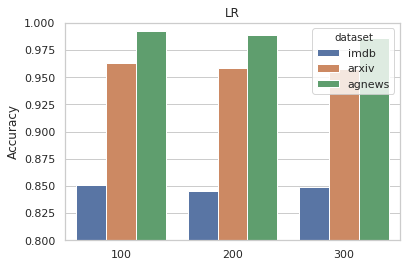

In [102]:
plt.title('LR')

ax = sns.barplot(x="word_len", y="LR_keys_te_acc", hue='dataset', data=d)
ax.set_ylabel('Accuracy')
ax.set_xlabel('')
plt.ylim((0.8, 1))

Text(0.5, 0, '')

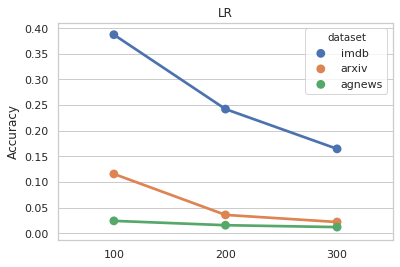

In [105]:
plt.title('LR')

ax = sns.pointplot(x="word_len", y="LR_keys_te_rejection_rate", hue='dataset', data=d)
ax.set_ylabel('Accuracy')
ax.set_xlabel('')

(0.8, 1)

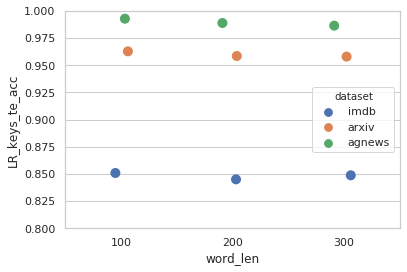

In [93]:
ax = sns.stripplot(x="word_len", y="LR_keys_te_acc", hue='dataset', data=d, size=10)

plt.ylim((0.8, 1))